# Import libraries and Load data

In [1]:
import sys
import os
sys.path.append("..")
from src import *

In [2]:
df = load_data("../data/processed/data.csv")
print(df.columns)
print(f"Data shape: {df.shape}")

Đã load dữ liệu: 142193 hàng, 26 cột
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month', 'Year', 'Season'],
      dtype='object')
Data shape: (142193, 26)


# Question 2: Phân bố mưa thay đổi thế nào theo mùa và vị trí
**State your research question clearly and specifically:** Phân tích và mô tả sự thay đổi của lượng mưa trung bình hàng ngày (đã chuẩn hóa) trên các vị trí khác nhau trong tập dữ liệu theo bốn mùa khí hậu Úc (Xuân, Hạ, Thu, Đông).  
**Make it precise enough to be answerable with your data:** Lượng mưa trung bình đã chuẩn hóa khác nhau như thế nào giữa các địa điểm (Location) và các mùa (Season)?  
**Why is this question worth investigating?:** Lượng mưa là yếu tố cơ bản và quan trọng nhất trong khí hậu. Việc hiểu rõ mô hình mưa theo không gian (vị trí) và thời gian (mùa) là nền tảng cho mọi phân tích sâu hơn về thời tiết, từ dự báo lũ lụt đến quản lý tài nguyên nước.  
**What benefits or insights would answering this question provide?:** Cung cấp cái nhìn trực quan về các vùng "điểm nóng" (nơi mưa nhiều) và "điểm lạnh" (nơi mưa ít) theo mùa, giúp nhận diện các mô hình khí hậu đặc trưng (ví dụ: mưa mùa hè ở phía Bắc, mưa mùa đông ở phía Nam).  
**Who would care about the answer?:** - Chính phủ và Cơ quan Quản lý Nước: Để phân bổ nguồn lực và quy hoạch thủy lợi. - Nông dân và Ngành Nông nghiệp: Để tối ưu hóa lịch trồng trọt, gieo hạt, và thu hoạch. - Ngành Du lịch và Bảo tồn: Để dự báo điều kiện thời tiết theo mùa.  
**What real-world problem or decision does this inform?:** Quyết định về phân bổ nguồn nước sạch, dự báo rủi ro thiên tai (hạn hán, lũ lụt), và lập kế hoạch sản xuất nông nghiệp theo từng vùng.  


1. PHÂN BỐ MƯA THEO MÙA VÀ VỊ TRÍ


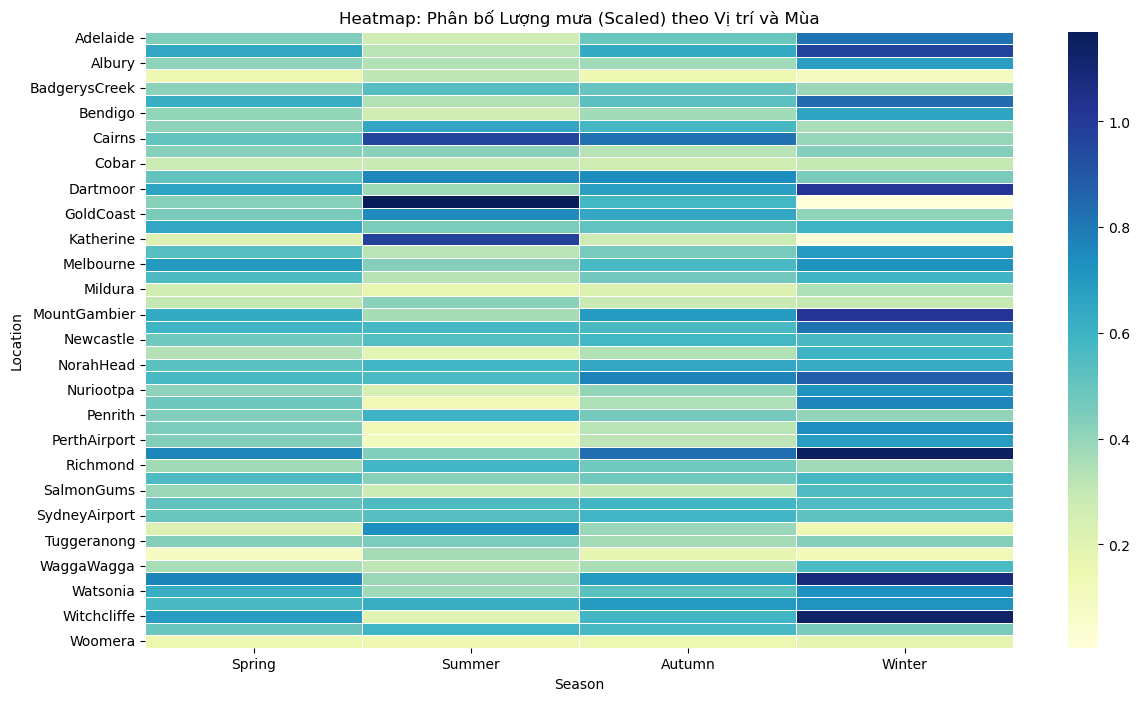

In [3]:
analyze_rainfall_distribution(df)

Nhìn vào Heatmap (Biểu đồ nhiệt) hiển thị lượng mưa trung bình (đã chuẩn hóa) theo từng Vị trí và Mùa.

- **Xu hướng Theo Mùa:** Lượng mưa có xu hướng không đồng đều giữa các mùa. Ví dụ, các khu vực phía Bắc có thể có lượng mưa cao nhất vào Mùa Hè (do gió mùa/bão), trong khi các khu vực phía Nam (như Tasmania) lại có lượng mưa cao hơn hoặc ổn định hơn vào Mùa Đông (do hệ thống front lạnh). Các mùa chuyển tiếp như Xuân/Thu có thể đóng vai trò cầu nối.

- **Xu hướng Theo Vị trí:** Có sự khác biệt lớn giữa các Location. Các địa điểm có màu đậm trên Heatmap (lượng mưa trung bình cao) thường là các thành phố ven biển Đông và Tây Nam. Ngược lại, các địa điểm nội địa hoặc khu vực khô cằn (như Uluru) có màu nhạt hơn nhiều xuyên suốt các mùa.

**Kết luận:** Phân bố mưa thay đổi rõ rệt. Vị trí đóng vai trò chủ đạo trong việc xác định tổng lượng mưa, trong khi mùa quyết định thời điểm lượng mưa tập trung cao điểm nhất tại khu vực đó.

# Question 3: Liệu có mối quan hệ thống kê có ý nghĩa giữa sự thay đổi áp suất khí quyển trong ngày (ΔPressure = Pressure3pm - Pressure9am) với khả năng có mưa vào ngày hôm sau (RainTomorrow) tại Albury không
H0: Không có sự khác biệt có ý nghĩa thống kê về sự thay đổi áp suất trong ngày (ΔPressure) giữa các nhóm có mưa ngày hôm sau (RainTomorrow=Yes) và không mưa (RainTomorrow=No)  
H1: Có sự khác biệt có ý nghĩa thống kê về sự thay đổi áp suất trong ngày (ΔPressure) giữa các nhóm có mưa và không mưa

**State your research question clearly and specifically:** Liệu giá trị trung bình của sự thay đổi áp suất trong ngày ($\Delta Pressure = P_{3pm} - P_{9am}$) có khác biệt có ý nghĩa thống kê giữa những ngày tại Albury mà có mưa vào hôm sau ($RainTomorrow=1$) và những ngày không mưa ($RainTomorrow=0$)?   
**Make it precise enough to be answerable with your data:** Sử dụng kiểm định T-test độc lập, xác định xem P-value có cho phép bác bỏ Giả thuyết Null ($H_0$: $\mu_{\Delta P_{Rain}} = \mu_{\Delta P_{NoRain}}$) tại mức ý nghĩa $\alpha=0.05$ hay không.  
**Why is this question worth investigating?:** Sự thay đổi áp suất là một trong những chỉ báo mạnh mẽ nhất của sự di chuyển của các hệ thống thời tiết. Áp suất giảm nhanh (âm) thường báo hiệu thời tiết xấu và khả năng mưa cao. Kiểm tra mối quan hệ này giúp xác nhận giá trị dự báo của biến số này trong mô hình.  
**What benefits or insights would answering this question provide?:** Xác nhận liệu $\Delta Pressure$ có nên được đưa vào làm một đặc trưng (feature) quan trọng trong mô hình học máy (Machine Learning) dự báo mưa hay không, đặc biệt tại Albury. Nếu có ý nghĩa, đây là một yếu tố dự báo có giá trị.  
**Who would care about the answer?:** - Các nhà Khoa học Dữ liệu và Kỹ sư Khí tượng: Để tối ưu hóa và tăng độ chính xác của các mô hình dự báo mưa. - Người dân Albury: Để hiểu rõ hơn về các yếu tố dự báo thời tiết địa phương.  
**What real-world problem or decision does this inform?:** Cải thiện độ chính xác của các ứng dụng dự báo thời tiết cục bộ. Việc có một chỉ báo đơn giản nhưng mạnh mẽ có thể giúp các mô hình dự báo hoạt động hiệu quả hơn, đặc biệt trong các trường hợp cần dự báo nhanh chóng.


2. KIỂM ĐỊNH THỐNG KÊ TẠI ALBURY
- Số mẫu nhóm Mưa (1): 618
- Số mẫu nhóm Không Mưa (0): 2393


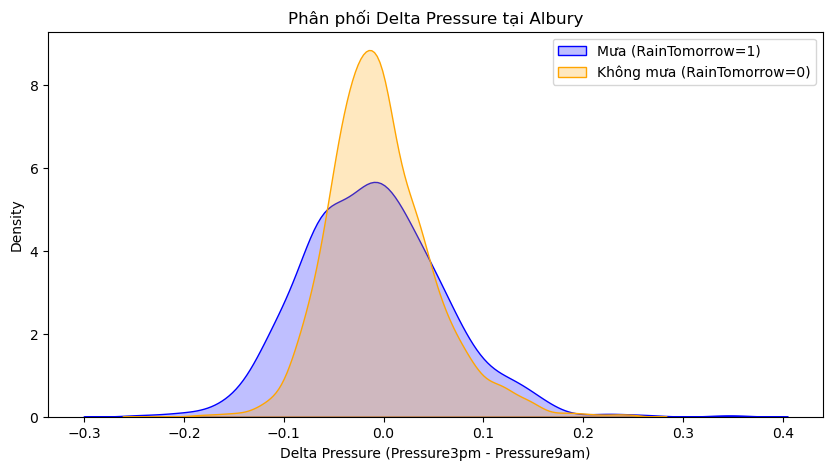

KẾT QUẢ KIỂM ĐỊNH:
T-statistic: -2.3765
P-value: 1.7712e-02
=> KẾT LUẬN: BÁC BỎ H0. Có sự khác biệt ý nghĩa thống kê về áp suất giữa hai nhóm.


In [4]:
 test_pressure_hypothesis(df, location_name='Albury')

**Phân tích và Kết luận:** Kiểm tra P-value: P-value là $0.0177$. Ngưỡng ý nghĩa thống kê ($\alpha$) thường được đặt là $0.05$.$$P\text{-value} (0.0177) < \alpha (0.05)$$
**Quyết định:** Vì P-value nhỏ hơn ngưỡng $\alpha$, chúng ta bác bỏ Giả thuyết Null ($H_0$).  
**Kết luận Ý nghĩa Thống kê:** **CÓ** mối quan hệ thống kê có ý nghĩa giữa sự thay đổi áp suất khí quyển trong ngày ($\Delta Pressure = P_{3pm} - P_{9am}$) với khả năng có mưa vào ngày hôm sau ($RainTomorrow$) tại Albury.  
**Diễn giải thêm từ T-statistic:**
- T-statistic có giá trị âm: $-2.3765$.
- Giá trị này chỉ ra rằng: Giá trị trung bình của $\Delta Pressure$ trong nhóm Có Mưa ($RainTomorrow=1$) thấp hơn đáng kể so với nhóm Không Mưa ($RainTomorrow=0$).
- Ý nghĩa Khí tượng: $\Delta Pressure = P_{3pm} - P_{9am}$. Giá trị $\Delta Pressure$ âm (áp suất giảm) cho thấy một hệ thống áp thấp đang tiến đến hoặc phát triển trong ngày. Việc $\Delta Pressure$ âm hơn đáng kể trong những ngày có mưa vào hôm sau củng cố nhận định khí tượng rằng: Áp suất giảm mạnh trong ngày là một dấu hiệu dự báo có ý nghĩa thống kê về khả năng có mưa lớn hơn vào ngày kế tiếp tại Albury.